Uma analise visual do trafego na rede Tor após a invasão russa à Ucrânia.
Todos os dados foram extraídos de https://metrics.torproject.org

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

# Importacao dos CSVs
def relayImport(x):
    return pd.read_csv('https://metrics.torproject.org/userstats-relay-country.csv?country=' + str(x), comment='#', parse_dates=['date'], index_col=['date'])

def bridgeImport(x):
    return pd.read_csv('https://metrics.torproject.org/userstats-bridge-country.csv?country=' + str(x), comment='#', parse_dates=['date'], index_col=['date'])

relayRu, bridgeRu = relayImport('ru'), bridgeImport('ru')
relayUa, bridgeUa = relayImport('ua'), bridgeImport('ua')

dfRu = pd.merge(relayRu, bridgeRu, how='inner', on='date', suffixes=('_relaysRU', '_bridgesRU'))
dfUa = pd.merge(relayUa, bridgeUa, how='inner', on='date', suffixes=('_relaysUA', '_bridgesUA'))
df = pd.merge(dfRu, dfUa, on='date', suffixes=('_RU', '_UA'))


In [5]:
df.columns

Index(['country_relaysRU', 'users_relaysRU', 'lower_RU', 'upper_RU',
       'frac_relaysRU', 'country_bridgesRU', 'users_bridgesRU',
       'frac_bridgesRU', 'country_relaysUA', 'users_relaysUA', 'lower_UA',
       'upper_UA', 'frac_relaysUA', 'country_bridgesUA', 'users_bridgesUA',
       'frac_bridgesUA'],
      dtype='object')

In [6]:

df = df.drop(['country_relaysRU', 'country_bridgesRU', 'country_relaysUA', 'country_bridgesUA'], axis=1)

In [7]:
df.head()

,users_relaysRU,lower_RU,upper_RU,frac_relaysRU,users_bridgesRU,frac_bridgesRU,users_relaysUA,lower_UA,upper_UA,frac_relaysUA,users_bridgesUA,frac_bridgesUA
date,,,,,,,,,,,,
2011-09-24,26861,17967.0,38987.0,26,3,11,5772,3568.0,8165.0,26,3,11
2011-09-25,27593,20968.0,39012.0,26,9,11,5986,4023.0,7891.0,26,9,11
2011-10-04,26802,18223.0,40620.0,24,2,13,6305,3793.0,8890.0,24,2,13
2011-10-05,27958,19172.0,39609.0,25,1,12,6691,4187.0,9090.0,25,1,12
2011-11-04,22755,9971.0,30069.0,41,1,31,5121,2360.0,7509.0,41,3,31


In [8]:
df.tail()

,users_relaysRU,lower_RU,upper_RU,frac_relaysRU,users_bridgesRU,frac_bridgesRU,users_relaysUA,lower_UA,upper_UA,frac_relaysUA,users_bridgesUA,frac_bridgesUA
date,,,,,,,,,,,,
2022-03-31,109800,100744.0,153580.0,94,44537,93,41551,36575.0,56529.0,94,867,93
2022-04-01,108784,99102.0,163833.0,92,45682,81,41489,34131.0,57242.0,92,789,81
2022-04-02,109016,87517.0,170565.0,92,43003,90,40885,29092.0,57570.0,92,833,90
2022-04-03,110344,96608.0,161302.0,91,44407,92,40347,31867.0,54029.0,91,873,92
2022-04-04,114636,97186.0,162858.0,88,42272,90,42391,32392.0,55114.0,88,916,90


In [9]:
df.shape

(3139, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2011-09-24 to 2022-04-04
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   users_relaysRU   3139 non-null   int64  
 1   lower_RU         3133 non-null   float64
 2   upper_RU         3133 non-null   float64
 3   frac_relaysRU    3139 non-null   int64  
 4   users_bridgesRU  3139 non-null   int64  
 5   frac_bridgesRU   3139 non-null   int64  
 6   users_relaysUA   3139 non-null   int64  
 7   lower_UA         3133 non-null   float64
 8   upper_UA         3133 non-null   float64
 9   frac_relaysUA    3139 non-null   int64  
 10  users_bridgesUA  3139 non-null   int64  
 11  frac_bridgesUA   3139 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 318.8 KB


In [11]:
df.describe()

,users_relaysRU,lower_RU,upper_RU,frac_relaysRU,users_bridgesRU,frac_bridgesRU,users_relaysUA,lower_UA,upper_UA,frac_relaysUA,users_bridgesUA,frac_bridgesUA
count,3139.000000,3133.000000,3.133000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3133.000000,3133.000000,3139.000000,3139.000000,3139.000000
mean,232906.012106,165874.746888,3.019049e+05,80.242434,7147.126792,66.057662,58681.087608,41645.077561,76575.566550,80.242434,958.810768,66.057662
std,93593.682145,62000.347142,1.431894e+05,12.911802,7193.385994,11.357320,46815.026424,34027.867831,62556.885168,12.911802,1412.752063,11.357320
min,15900.000000,0.000000,1.931800e+04,24.000000,0.000000,11.000000,4061.000000,0.000000,5246.000000,24.000000,0.000000,11.000000
25%,179419.000000,138537.000000,2.088640e+05,68.000000,1086.500000,59.000000,31515.000000,24375.000000,37486.000000,68.000000,189.000000,59.000000
50%,228845.000000,170321.000000,2.872630e+05,82.000000,7040.000000,66.000000,43633.000000,31663.000000,57274.000000,82.000000,643.000000,66.000000
75%,296932.000000,197733.000000,3.943690e+05,91.000000,9588.000000,74.000000,66665.500000,43732.000000,90547.000000,91.000000,1075.500000,74.000000
max,583305.000000,379543.000000,1.452365e+06,108.000000,50654.000000,104.000000,320670.000000,268082.000000,408061.000000,108.000000,13765.000000,104.000000


In [12]:
# Funcao para agilizar a plotagem
def viz(axes, a, b, color, xlabel, ylabel):
    axes.plot(a, b, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', color=color)

def porcentagem(a, b):
    return 'Crescimento de: ' + str(a / b * 100) + '%.'

def plotAnnotate(axes, tag, x, y, xtext, ytext, style, color):
    axes.annotate(tag, xy=(x, y), xytext=(xtext, ytext), arrowprops={'arrowstyle': style, 'color': color})

def snsviz(axes, df, a, b, xlabel, ylabel, title):
    sns.lineplot(ax=axes, data=df, x=a, y=b)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)


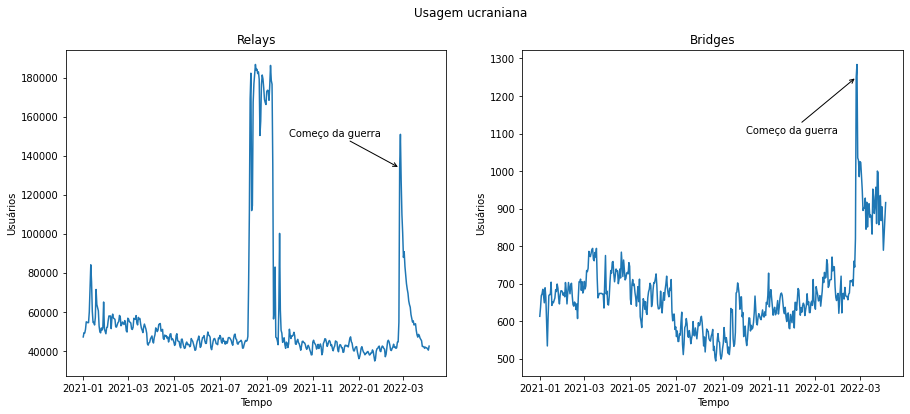

In [15]:
start = '2021-01-01'

# Plot of Ukrainian stats
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 6))
fig.suptitle('Usagem ucraniana')
#plt.style.use('bmh')
#plt.title('Usagem ucraniana da rede Tor')

snsviz(ax[0], df[start:], 'date', 'users_relaysUA', 'Tempo', 'Usuários', 'Relays')
plotAnnotate(ax[0], 'Começo da guerra', pd.Timestamp('2022-02-24'), relayUa['users'].loc['2022-02-24'], pd.Timestamp('2021-10-01'), 150000, \
    '->', 'black')

snsviz(ax[1], df[start:], 'date', 'users_bridgesUA', 'Tempo', 'Usuários', 'Bridges')
plotAnnotate(ax[1], 'Começo da guerra', pd.Timestamp('2022-02-24'), bridgeUa['users'].loc['2022-02-24'], pd.Timestamp('2021-10-01'), 1100, \
    '->', 'black')

plt.savefig('usagemUcrania.png', bbox_inches='tight')

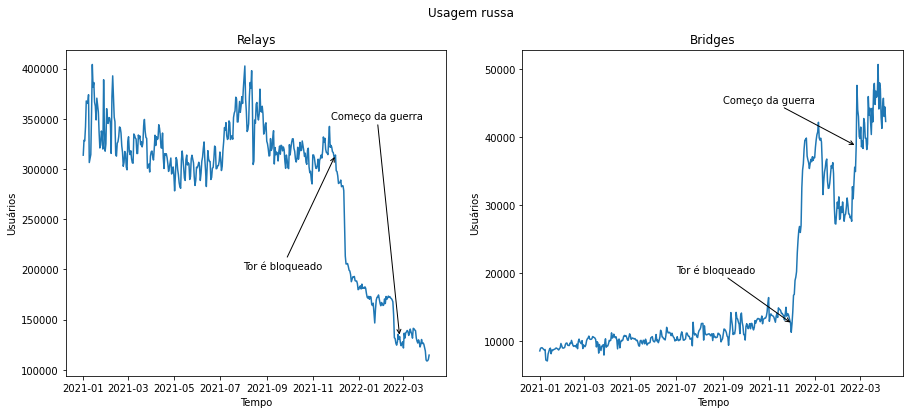

In [14]:
# Plot of Russian stats
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True)
fig.suptitle('Usagem russa')

# First plot
snsviz(ax[0], df[start:], 'date', 'users_relaysRU', 'Tempo', 'Usuários', 'Relays')
plotAnnotate(ax[0], 'Tor é bloqueado', pd.Timestamp('2021-12-01'), relayRu['users'].loc['2021-12-01'], \
    pd.Timestamp('2021-08-01'), 200000, '->', 'black')
plotAnnotate(ax[0], 'Começo da guerra', pd.Timestamp('2022-02-24'), relayRu['users'].loc['2022-02-24'], \
    pd.Timestamp('2021-11-25'), 350000, '->', 'black')

# Second plot
snsviz(ax[1], df[start:], 'date', 'users_bridgesRU', 'Tempo', 'Usuários', 'Bridges')
plotAnnotate(ax[1], 'Tor é bloqueado', pd.Timestamp('2021-12-01'), bridgeRu['users'].loc['2021-12-01'], \
    pd.Timestamp('2021-07-01'), 20000, '->', 'black')
plotAnnotate(ax[1], 'Começo da guerra', pd.Timestamp('2022-02-24'), bridgeRu['users'].loc['2022-02-24'], \
    pd.Timestamp('2021-09-01'), 45000, '->', 'black')


plt.savefig('russian_usage.png', bbox_inches='tight')
